In [15]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [16]:
# 1. Load dataset MNIST từ OpenML
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = pd.DataFrame(mnist.data.astype(np.float32))
y = pd.Series(mnist.target.astype(np.int64))

Loading MNIST dataset...


In [17]:
# In thông tin về dataset
print(f"Shape of X: {X.shape}")  # (70000, 784)
print(f"Shape of y: {y.shape}")  # (70000,)

Shape of X: (70000, 784)
Shape of y: (70000,)


In [18]:
X # Dataframe

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y # Series

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [20]:
def plot_some_images(X, y, n=10):
    plt.figure(figsize=(15, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        image = X.iloc[i].values.reshape(28, 28)  # Lấy giá trị từ DataFrame, reshape thành ảnh 28x28
        label = y.iloc[i]                         # Lấy label tương ứng
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


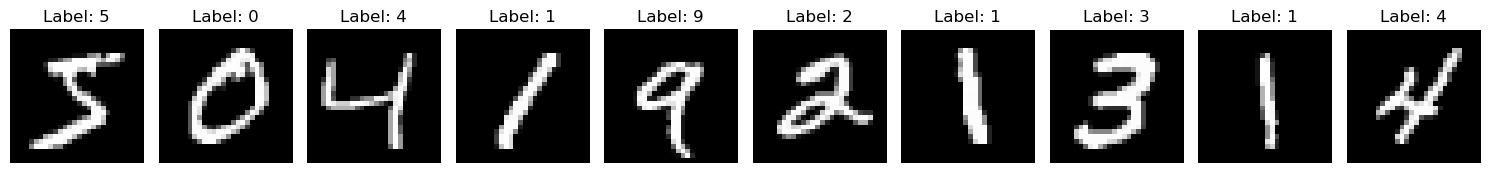

In [21]:
plot_some_images(X, y)

In [22]:
# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Chia tập dữ liệu thành Train và Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# Hàm huấn luyện mô hình Logistic Regression và trả về accuracy và training time
def evaluate_logistic_regression(X_train, X_test, y_train, y_test, model_label=""):
    clf = LogisticRegression(max_iter=1000)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    training_time = end_time - start_time
    print(f"{model_label} - Accuracy: {acc*100:.2f}%, Training Time: {training_time:.2f} sec")
    return acc, training_time

In [24]:
print("\n--- Huấn luyện mô hình không dùng PCA ---")
acc_no_pca, time_no_pca = evaluate_logistic_regression(X_train, X_test, y_train, y_test, "No PCA")


--- Huấn luyện mô hình không dùng PCA ---
No PCA - Accuracy: 91.59%, Training Time: 23.48 sec


In [ ]:
# List số thành phần PCA cần thử nghiệm
pca_components = [10, 20, 30, 40, 50, 100, 150, 200]

# Danh sách lưu kết quả cho PCA
acc_list = []
time_list = []

# Vòng lặp thử nghiệm với các số thành phần PCA khác nhau
for n_components in pca_components:
    print(f"\n--- Huấn luyện mô hình dùng PCA (n_components = {n_components}) ---")
    pca = PCA(n_components=n_components)
    # Huấn luyện PCA trên tập train, chuyển đổi cả train và test
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"Shape sau PCA (Train): {X_train_pca.shape}")
    print(f"Shape sau PCA (Test): {X_test_pca.shape}")
    
    acc, training_time = evaluate_logistic_regression(X_train_pca, X_test_pca, y_train, y_test, model_label=f"PCA ({n_components} components)")
    acc_list.append(acc)
    time_list.append(training_time)


--- Huấn luyện mô hình dùng PCA (n_components = 10) ---
Shape sau PCA (Train): (56000, 10)
Shape sau PCA (Test): (14000, 10)
PCA (10 components) - Accuracy: 80.19%, Training Time: 2.48 sec

--- Huấn luyện mô hình dùng PCA (n_components = 20) ---
Shape sau PCA (Train): (56000, 20)
Shape sau PCA (Test): (14000, 20)
PCA (20 components) - Accuracy: 86.99%, Training Time: 3.35 sec

--- Huấn luyện mô hình dùng PCA (n_components = 30) ---
Shape sau PCA (Train): (56000, 30)
Shape sau PCA (Test): (14000, 30)
PCA (30 components) - Accuracy: 89.30%, Training Time: 4.92 sec

--- Huấn luyện mô hình dùng PCA (n_components = 40) ---
Shape sau PCA (Train): (56000, 40)
Shape sau PCA (Test): (14000, 40)
PCA (40 components) - Accuracy: 90.24%, Training Time: 4.38 sec

--- Huấn luyện mô hình dùng PCA (n_components = 50) ---
Shape sau PCA (Train): (56000, 50)
Shape sau PCA (Test): (14000, 50)
PCA (50 components) - Accuracy: 90.64%, Training Time: 5.32 sec

--- Huấn luyện mô hình dùng PCA (n_components = 1

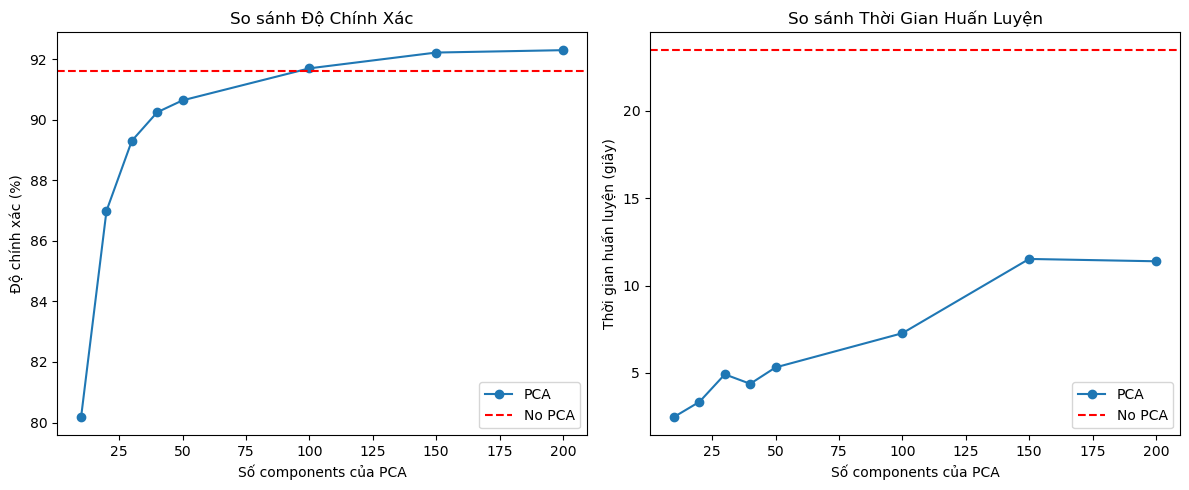

In [26]:
# 4. Trực quan hóa kết quả
plt.figure(figsize=(12, 5))

# Đồ thị Accuracy
plt.subplot(1, 2, 1)
plt.plot(pca_components, np.array(acc_list)*100, marker='o', label='PCA')
plt.axhline(np.array(acc_no_pca)*100, color='r', linestyle='--', label='No PCA')
plt.xlabel("Số components của PCA")
plt.ylabel("Độ chính xác (%)")
plt.title("So sánh Độ Chính Xác")
plt.legend()

# Đồ thị Training Time
plt.subplot(1, 2, 2)
plt.plot(pca_components, time_list, marker='o', label='PCA')
plt.axhline(time_no_pca, color='r', linestyle='--', label='No PCA')
plt.xlabel("Số components của PCA")
plt.ylabel("Thời gian huấn luyện (giây)")
plt.title("So sánh Thời Gian Huấn Luyện")
plt.legend()

plt.tight_layout()
plt.show()

---

In [27]:
# # 4. Áp dụng PCA
# n_components = 30
# pca = PCA(n_components=n_components)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# print(f"Shape sau PCA (Train): {X_train_pca.shape}")
# print(f"Shape sau PCA (Test): {X_test_pca.shape}")

# print("\n--- Huấn luyện mô hình dùng PCA (n_components = 30) ---")
# acc_pca, time_pca = evaluate_logistic_regression(X_train_pca, X_test_pca, y_train, y_test, "With PCA")

In [28]:
# # 5. Tổng hợp kết quả
# print("\n--- Kết quả so sánh ---")
# print(f"Không dùng PCA: Accuracy = {acc_no_pca*100:.2f}%, Training Time = {time_no_pca:.2f} seconds")
# print(f"Dùng PCA:       Accuracy = {acc_pca*100:.2f}%, Training Time = {time_pca:.2f} seconds")
# print(f"Giảm thời gian huấn luyện: {((time_no_pca - time_pca) / time_no_pca) * 100:.2f}%")
# print(f"Giảm độ chính xác: {((acc_no_pca - acc_pca) / acc_no_pca) * 100:.2f}%")